This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [4]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

2023-04-13 23:05:57.935631: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [0]:
x = tf.zeros(shape=(2, 1))
print(x)

**Random tensors**

In [0]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

In [0]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

**NumPy arrays are assignable**

In [40]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.47222158],
       [ 1.9050715 ],
       [-1.3755403 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [6]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [0]:
v[0, 0].assign(3.)

**Using `assign_add`**

In [0]:
v.assign_add(tf.ones((3, 1)))

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [0]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [9]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [11]:
tf.Variable(initial_value=3)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [12]:
tf.Variable(initial_value=3.)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

**Using `GradientTape` with constant tensor inputs**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [16]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [17]:
result

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

**Using nested gradient tapes to compute second-order gradients**

In [18]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [19]:
position

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [20]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [21]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [27]:
time= tf.Variable(0.)
with tf.GradientTape(persistent=True) as tape:
    position= 4.9*time** 2
    speed= tape.gradient(position, time)
    acceleration= tape.gradient(speed, time)

In [28]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

In [25]:
speed

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [44]:
test=[np.array([1,1]),np.array([2,3])]


In [45]:
type(test)

list

In [29]:
[[1,1],[2,3]]

[[1, 1], [2, 3]]

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [46]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [47]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [82]:
inputs

array([[ 0.11489515,  3.1716707 ],
       [ 0.44818014,  3.6345723 ],
       [-0.5046443 ,  2.5322769 ],
       ...,
       [ 2.3688815 , -0.7610112 ],
       [ 3.1235917 , -0.45903146],
       [ 2.7739077 , -0.17584999]], dtype=float32)

**Generating the corresponding targets (0 and 1)**

In [50]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [80]:
np.ones((10,2,3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

**Plotting the two point classes**

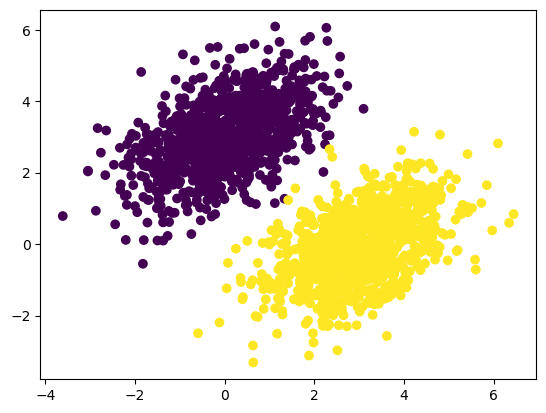

In [81]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [83]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [114]:
np.arange(24).reshape((2,3,4)).reshape((2,3*4))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [142]:
test=[1,3,5,7,9,13]

In [145]:
test[:4]

[1, 3, 5, 7]

In [146]:
test[4:]

[9, 13]

In [139]:
np.random.random((10,))

array([0.89154246, 0.89264491, 0.01502864, 0.09436234, 0.5581641 ,
       0.53923552, 0.35365   , 0.15973929, 0.81006161, 0.00522214])

**The forward pass function**

In [0]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [0]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [0]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [0]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

In [0]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [0]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [148]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [149]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [150]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [151]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [152]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [153]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [154]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [155]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 2.7430 - binary_accuracy: 0.2245
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 2.5475 - binary_accuracy: 0.2490
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 2.3850 - binary_accuracy: 0.2660
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 2.2343 - binary_accuracy: 0.2835
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 2.0873 - binary_accuracy: 0.2980


In [156]:
history.history

{'loss': [2.742976665496826,
  2.5474674701690674,
  2.3850324153900146,
  2.2342677116394043,
  2.0873193740844727],
 'binary_accuracy': [0.22450000047683716,
  0.24899999797344208,
  0.26600000262260437,
  0.28349998593330383,
  0.2980000078678131]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [157]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.1056 - binary_accuracy: 0.9393 - val_loss: 0.0612 - val_binary_accuracy: 0.9833
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0649 - binary_accuracy: 0.9650 - val_loss: 0.0414 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0723 - binary_accuracy: 0.9557 - val_loss: 0.2485 - val_binary_accuracy: 0.7967
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0719 - binary_accuracy: 0.9586 - val_loss: 0.0584 - val_binary_accuracy: 0.9917
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0688 - binary_accuracy: 0.9671 - val_loss: 0.1216 - val_binary_accuracy: 0.9883


### Inference: Using a model after training

In [163]:
predictions = model.predict(val_inputs, batch_size=64)
print(predictions[:10])

10/10 [==============================] - 0s 44ms/step
[[-0.4907601 ]
 [-0.13335794]
 [ 1.365519  ]
 [-0.4581219 ]
 [ 0.75293255]
 [ 0.85450083]
 [ 1.258472  ]
 [-0.13195068]
 [ 0.9120293 ]
 [-0.56785864]]


In [164]:
len(predictions)

600

## Summary